# MNIST Hand Digit Recognition - using Keras Convolutional Neural Network Model


In [1]:
import tensorflow as tf 
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix

%matplotlib inline

Using TensorFlow backend.


In [0]:
# Load MNIST hand digit recognition dataset
mnist = tf.keras.datasets.mnist

In [0]:
# Normalization of features
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

In [0]:
tf.keras.backend.image_data_format()

'channels_last'

First 4 hand digit training examples:


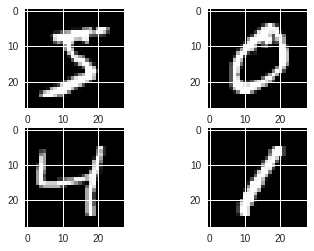

Corresponding output labels:  [5 0 4 1]


In [0]:
# Show first 4 hand digit recognition data
print('First 4 hand digit training examples:')
plt.subplot(221)
plt.imshow(x_train[0], cmap='gray')
plt.subplot(222)
plt.imshow(x_train[1], cmap='gray')
plt.subplot(223)
plt.imshow(x_train[2], cmap='gray')
plt.subplot(224)
plt.imshow(x_train[3], cmap='gray')
plt.show()

print('Corresponding output labels: ', y_train[0:4])

In [0]:
# Training dataset information
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print('Shape of training feature example: ', x_train[0].shape)
print('Shape of training examples: ', x_train.shape)
print('Number of training examples: ', len(x_train))
print('Shape of training labels: ', y_train.shape)
print('Number of training labels: ', len(y_train))

Shape of training feature example:  (28, 28, 1)
Shape of training examples:  (60000, 28, 28, 1)
Number of training examples:  60000
Shape of training labels:  (60000,)
Number of training labels:  60000


In [4]:
# Testing dataset information
print('Testing examples shape: ', x_test.shape)
print('Number of testing examples: ', len(x_test))
print('Testing labels shape: ', y_test.shape)
print('Number of testing lables: ', len(y_test)) 

Testing examples shape:  (10000, 28, 28)
Number of testing examples:  10000
Testing labels shape:  (10000,)
Number of testing lables:  10000


In [0]:
# One hot encoding training labels 
one_hot_labels = tf.keras.utils.to_categorical(y_train, num_classes=10)
one_hot_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [0]:
# Build CNN model
def build_model():
  '''
  Builds CNN model
  
  Returns:
  model -- 
  '''

  model = Sequential()
  model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(Flatten())
  model.add(Dense(128))
  model.add(Activation('relu'))
  model.add(Dense(10, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  
  return model

# Fit the CNN model without validation set

In [0]:
# model summary 
model_1 = build_model()
print(model_1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
activation_13 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
activation_14 (Activation)   (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 3, 3, 64)          18496     
__________

In [0]:
# fit the model without validation set
history_wo_val_set = model_1.fit(x_train, one_hot_labels, epochs=10, batch_size=500, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 34s 567us/step - loss: 0.5539 - acc: 0.8498
Epoch 2/10
60000/60000 [==============================] - 33s 546us/step - loss: 0.1210 - acc: 0.9638
Epoch 3/10
60000/60000 [==============================] - 34s 561us/step - loss: 0.0779 - acc: 0.9768
Epoch 4/10
60000/60000 [==============================] - 33s 550us/step - loss: 0.0589 - acc: 0.9822
Epoch 5/10
60000/60000 [==============================] - 33s 550us/step - loss: 0.0495 - acc: 0.9848
Epoch 6/10
60000/60000 [==============================] - 33s 549us/step - loss: 0.0422 - acc: 0.9873
Epoch 7/10
60000/60000 [==============================] - 33s 555us/step - loss: 0.0368 - acc: 0.9884
Epoch 8/10
60000/60000 [==============================] - 33s 551us/step - loss: 0.0327 - acc: 0.9899
Epoch 9/10
60000/60000 [==============================] - 33s 551us/step - loss: 0.0291 - acc: 0.9911
Epoch 10/10
60000/60000 [==============================] - 33s 555us/step - loss: 

# Fit CNN model with validation set


In [0]:
# fit the model with validation set
model_2 = build_model()
history_w_val_set = model_2.fit(x_train, one_hot_labels, epochs=10, validation_split=0.2, batch_size=500, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 30s 617us/step - loss: 0.6228 - acc: 0.8357 - val_loss: 0.1800 - val_acc: 0.9468
Epoch 2/10
48000/48000 [==============================] - 29s 613us/step - loss: 0.1378 - acc: 0.9586 - val_loss: 0.0920 - val_acc: 0.9743
Epoch 3/10
48000/48000 [==============================] - 29s 610us/step - loss: 0.0872 - acc: 0.9735 - val_loss: 0.0699 - val_acc: 0.9794
Epoch 4/10
48000/48000 [==============================] - 29s 609us/step - loss: 0.0639 - acc: 0.9806 - val_loss: 0.0657 - val_acc: 0.9816
Epoch 5/10
48000/48000 [==============================] - 30s 622us/step - loss: 0.0533 - acc: 0.9836 - val_loss: 0.0552 - val_acc: 0.9832
Epoch 6/10
48000/48000 [==============================] - 29s 611us/step - loss: 0.0431 - acc: 0.9869 - val_loss: 0.0481 - val_acc: 0.9858
Epoch 7/10
48000/48000 [==============================] - 29s 607us/step - loss: 0.0394 - acc: 0.9879 - val_loss: 0.

# Plot training and validation errors


In [0]:
# Train test plot for model without validation set
def plot_history(history):
  '''
  Plots train validation set error and accuracy
  
  Arguments:
  history -- model history
  '''
  
  plt.subplot(211)
  plt.plot(history.epoch, np.array(history.history['loss']), label='Train Loss')
  if 'val_loss' in history.history:
    plt.plot(history.epoch, np.array(history.history['val_loss']), label='Val Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  plt.subplot(212)
  plt.plot(history.epoch, np.array(history.history['acc']), label='Train Acc')
  if 'val_loss' in history.history:
    plt.plot(history.epoch, np.array(history.history['val_acc']), label='Val Acc')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.show()

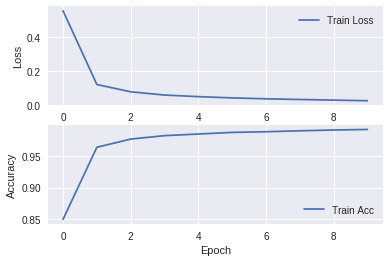

In [0]:
# plot
plot_history(history_wo_val_set)

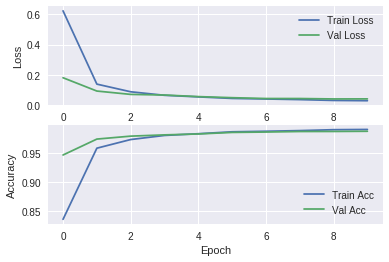

In [0]:
# plot
plot_history(history_w_val_set)

# Model Analysis

In [0]:
# Model analysis - Prediction and confusion matrix
def model_analysis(model, x_test, y_test):
  '''
  Result analysis
  
  Arguments:
  model -- keras model
  x_test -- 
  y_test -- 
  
  '''
  
  # Model predict labels
  y_predicted = model.predict(x_test)
  
  # Invert one-hot-encoded values
  y_predicted = np.argmax(y_predicted, axis=1)
  
  print('True Labels: ', y_test)
  print('Predicted Labels: ', y_predicted)
  print()
  
  # Evaluate the model - loss value and metric (accuracy) value
  one_hot_encode_test_label = tf.keras.utils.to_categorical(y_test, num_classes=10)
  scores = model.evaluate(x_test, one_hot_encode_test_label, verbose=0)
  print("Test Error: %.2f%%" % (scores[0]*100))
  print("Test Accuracy: %.2f%%" % (scores[1]*100))
  print()

  # Confusion matrix
  cmap = plt.cm.Blues
  cm = confusion_matrix(y_test, y_predicted)
  plt.figure(figsize=(12,12))
  plt.title('MNIST Hand Digit Recognition Dataset', fontsize=24)
  sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 12}, cmap='Blues')
  plt.xlabel('True Labels', fontsize=20)
  plt.ylabel('Predicted Labels', fontsize=20)
  plt.show()

True Labels:  [7 2 1 ... 4 5 6]
Predicted Labels:  [7 2 1 ... 4 5 6]

Test Error: 2.66%
Test Accuracy: 99.11%



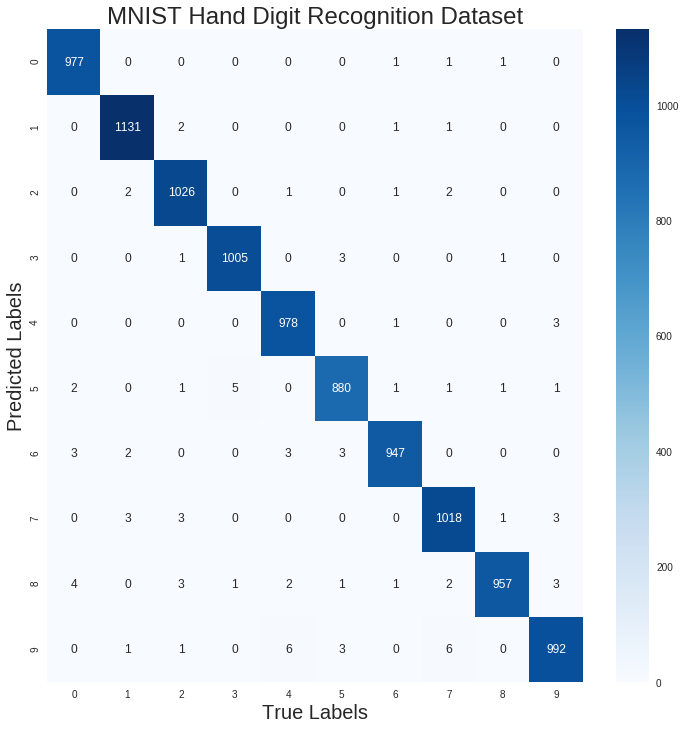

In [0]:
# Analysis of model without validation set
model_analysis(model_1, x_test, y_test)

True Labels:  [7 2 1 ... 4 5 6]
Predicted Labels:  [7 2 1 ... 4 5 6]

Test Error: 3.22%
Test Accuracy: 98.95%



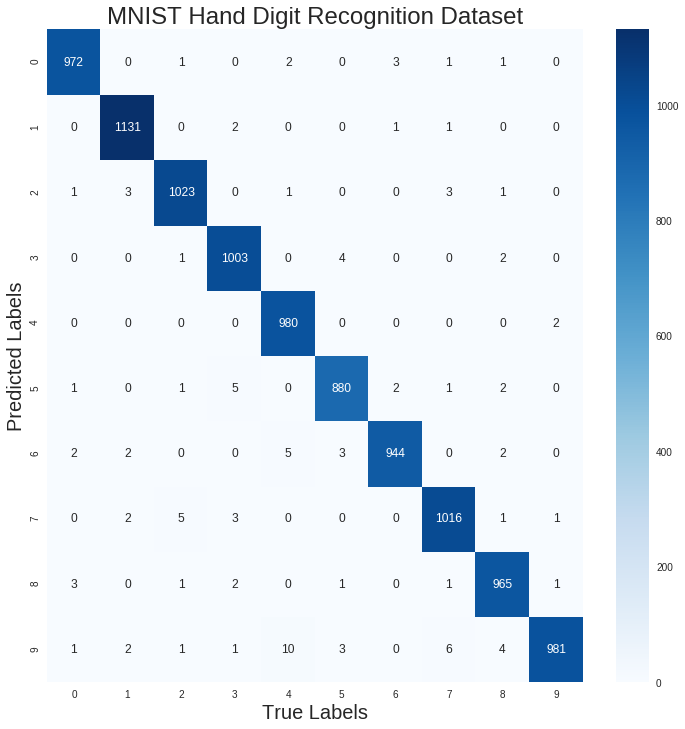

In [0]:
# Analysis of model with validation set
model_analysis(model_2, x_test, y_test)